<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:

# Your code here
from bs4 import BeautifulSoup
import requests


Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, "html5lib")


Scrape the `Language name` and `annual average salary`.


In [5]:

#your code goes here
table = soup.find("table")
popular_language =[]
for row in table.find_all('tr'):
    cols= row.find_all('td')
    language= cols[1].getText()
    salary = cols[3].getText()
    print(("{}--->{}").format(language,salary))
    popular_lan=[language,salary]
    popular_language.append(popular_lan)
print(popular_language)

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082
[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named *popular-languages.csv*


/tmp/wsuser/ipykernel_154/920293164.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')


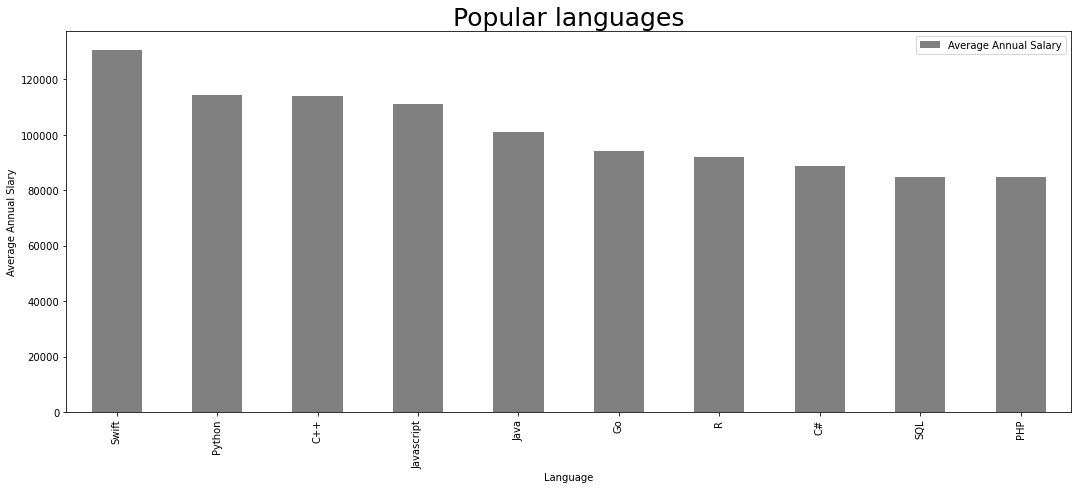

In [7]:
# your code goes here
import csv
with open('popular-languages.csv','w',newline='') as file:
    csvwriter = csv.writer(file)
    for row in popular_language:
        csvwriter.writerow(row)
        
import pandas as pd
df = pd.read_csv('popular-languages.csv')
#Checking the first 50 rows
df.head(50)
#Preparing to plot but first removing the dollar sign
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')
#Replacing the comma
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '')
#Converting the string to integar
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)
#Sorting the values in descending order
df = df.sort_values(by='Average Annual Salary', ascending=False)
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
df.plot(kind = 'bar', x ='Language', y = 'Average Annual Salary', color = 'grey', figsize = (18,7))
plt.title('Popular languages', size=25)
plt.ylabel('Average Annual Slary')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
